In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
from scipy.stats import norm

In [6]:
from scipy import stats

In [7]:
%matplotlib inline

In [8]:
data=pd.read_csv('auto-mpg.csv',index_col='car name')

In [9]:
print(data.head())
print(data.index)
print(data.columns)

                            mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   

                           acceleration  model year  origin  
car name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1  
Index(['chev

In [10]:
data.shape

(398, 8)

In [11]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [12]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [13]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [14]:
data = data[data.horsepower != '?']

In [15]:
print('?' in data.horsepower)

False


In [16]:
data.shape

(392, 8)

In [17]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [18]:
data.horsepower = data.horsepower.astype('float')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [19]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [20]:
data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

/Users/dheervarsani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

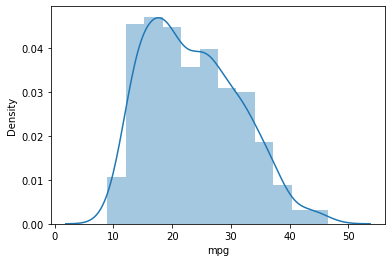

In [21]:
sns.distplot(data['mpg'])

In [22]:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


In [23]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [24]:
data_scale = data.copy()

In [25]:
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [26]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1


In [27]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

In [28]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code
car name,,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,USA
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,USA
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,USA
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,USA
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,USA


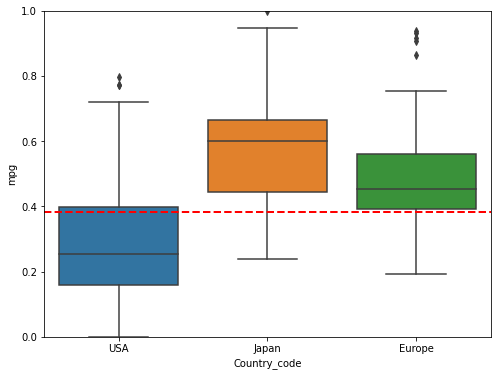

In [29]:
var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

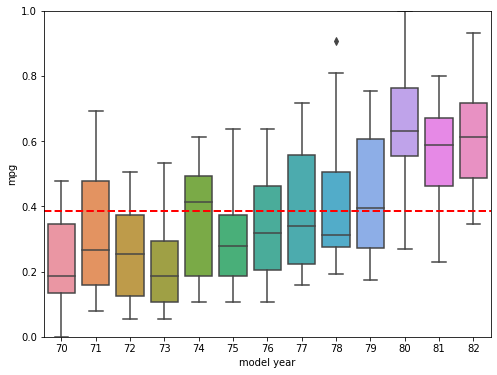

In [30]:
var = 'model year'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

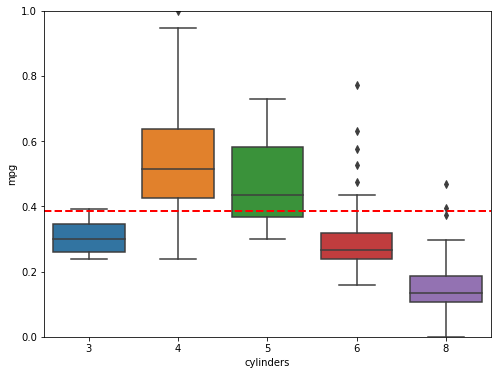

In [31]:
var = 'cylinders'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

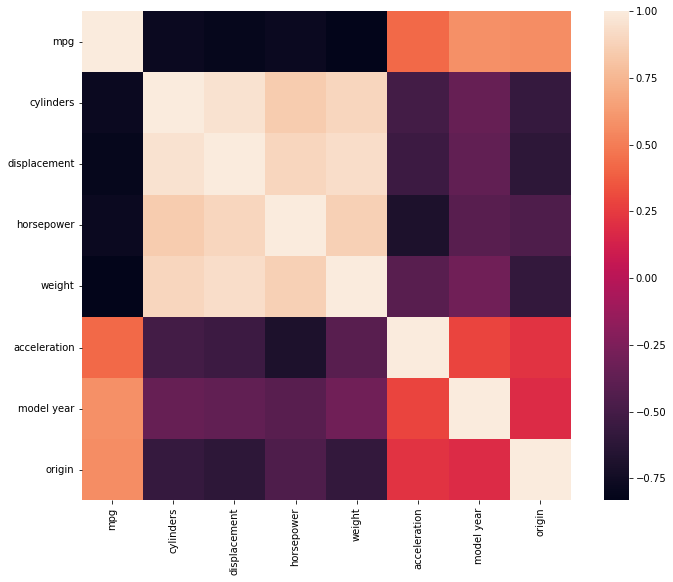

In [32]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

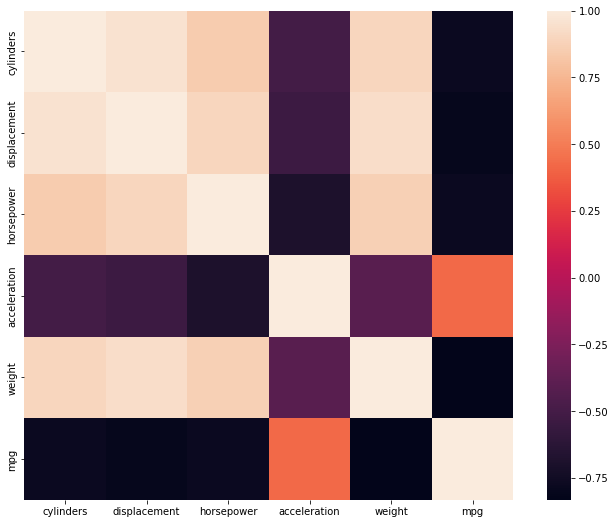

In [33]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']
corrmat = data[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [34]:
data.columns.is_unique
data.columns.duplicated()
data.loc[:, ~data.columns.duplicated()]
data.reset_index(level=0, inplace=True)


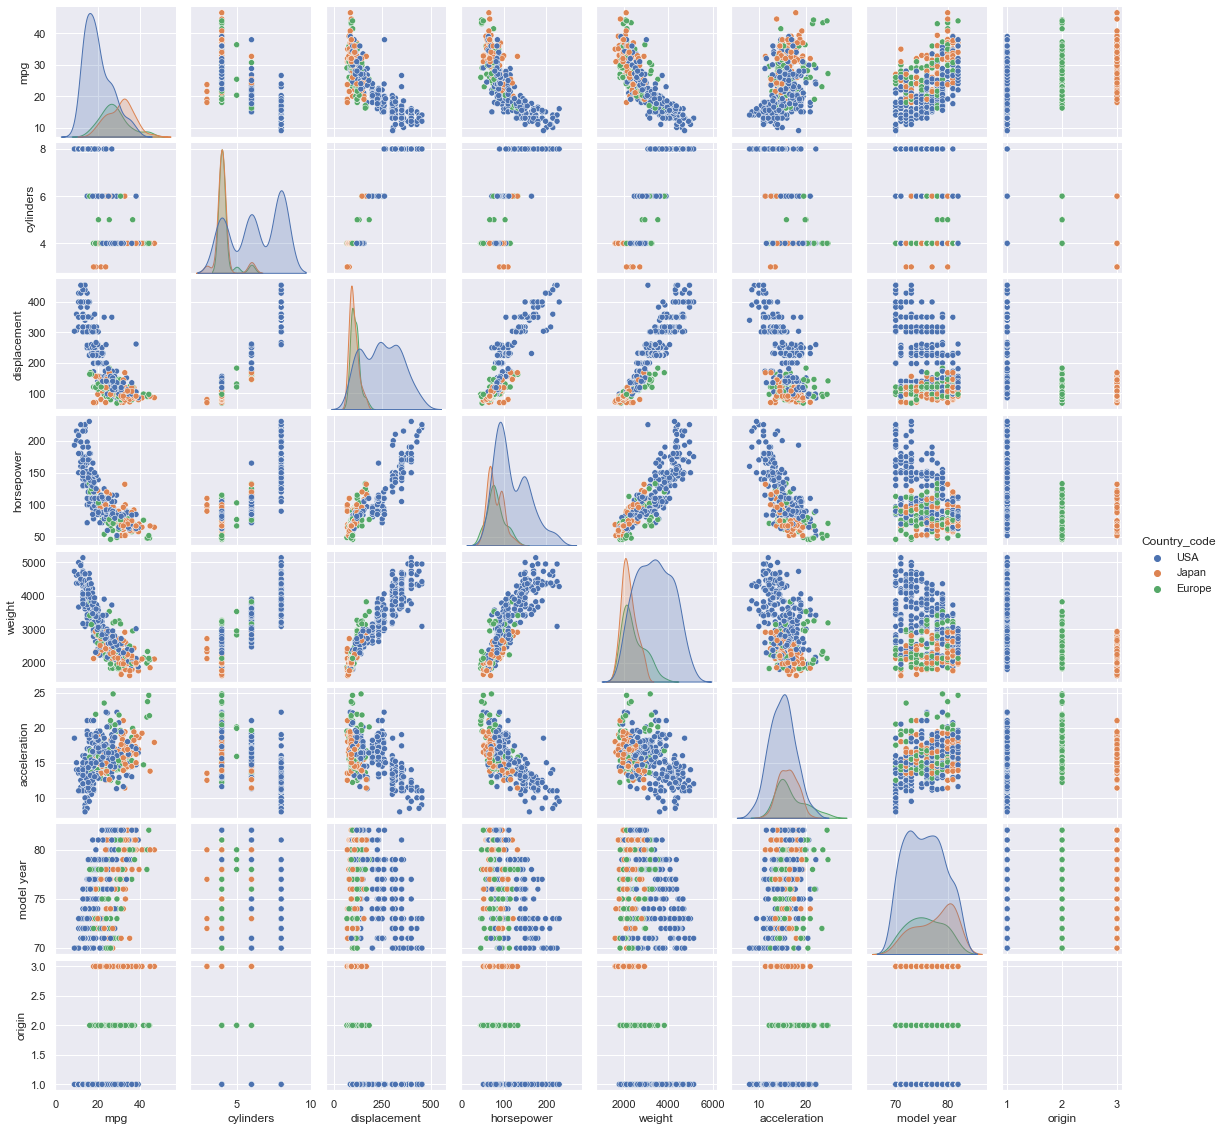

In [35]:
#scatterplot
sns.set()
sns.pairplot(data, height = 2.0, hue ='Country_code', kind='scatter')
plt.show()

In [36]:
data.origin.unique()

array([1, 3, 2])

In [37]:
data.index.is_unique

True

In [38]:
data.head()

,car name,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car name      392 non-null    object 
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   model year    392 non-null    int64  
 8   origin        392 non-null    int64  
 9   Country_code  392 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 30.8+ KB
